# Experiments one of malware detection for CTU-50

In [1]:
%load_ext autoreload
%autoreload 2

#import tensorflow
import pandas as pd
#from zat import zeek_log_reader
import pprint
#from zat.log_to_dataframe import LogToDataFrame
from matplotlib import pyplot as plt
import sklearn


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.inspection import DecisionBoundaryDisplay



In [5]:
# Load data
df_1_1 = pd.read_csv('ctu-50-features/Client1/Day1/comb_features.csv')

In [6]:
print(f'Amount of features: {len(df_1_1.columns)}')
print(f'Amount of rows: {len(df_1_1)}')

Amount of features: 49
Amount of rows: 345


In [12]:
df_1_1.dtypes
print(df_1_1.columns)

Index(['num_flows', 'avg_dur', 'std_dev_dur', 'percent_stdev_dur',
       'total_size_of_flows_orig', 'total_size_of_flows_resp',
       'ratio_of_sizes', 'percent_of_established_states', 'inbound_pckts',
       'outbound_pckts', 'periodicity_avg', 'periodicity_stdev', 'ssl_ratio',
       'average_public_key', 'tls_version_ratio', 'avg_cert_length',
       'stdev_cert_length', 'is_valid_certificate_during_capture',
       'amount_diff_certificates', 'num_domains_in_cert', 'cert_ratio',
       'num_certificate_path', 'x509_ssl_ratio', 'SNI_ssl_ratio',
       'self_signed_ratio', 'is_SNIs_in_SNA_dns', 'SNI_equal_DstIP',
       'is_CNs_in_SNA_dns', 'ratio_of_differ_SNI_in_ssl_log',
       'ratio_of_differ_subject_in_ssl_log',
       'ratio_of_differ_issuer_in_ssl_log', 'ratio_of_differ_subject_in_cert',
       'ratio_of_differ_issuer_in_cert', 'ratio_of_differ_sandns_in_cert',
       'ratio_of_same_subjects', 'ratio_of_same_issuer',
       'ratio_is_same_CN_and_SNI', 'avg_certificate_expo

In [8]:
from plotly.offline import init_notebook_mode, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)         # initiate notebook for offline plot
import plotly

import plotly.graph_objects as go
import chart_studio.plotly as py

#fig = px.density_heatmap(df, x="day", y="cert_ratio")
#fig.show()
#table = ff.create_table(df)
#py.iplot(table, filename='jupyter-table1')

#data = [go.Bar(x=df.num_flows, y=df.avg_dur)]
#py.iplot(data, filename='jupyter-basic_bar')

trace0 = go.Histogram(
   x = df_1_1.std_dev_dur
)

data = [trace0]
plotly.offline.iplot({ "data": data,"layout": go.Layout(title="Num flows/Avg Dur")})



In [9]:
import plotly.express as px 
df_int = df_1_1.select_dtypes(include=['int64'])
fig = px.histogram(df_int, x='num_flows', y=df_int.columns)
fig.show()

In [10]:
sub_df = df_1_1[['num_flows', 
             'avg_dur', 
             'std_dev_dur',
             'percent_stdev_dur',
             'total_size_of_flows_orig', 
             'total_size_of_flows_resp', 
             'ratio_of_sizes',
             'percent_of_established_states',
             'inbound_pckts',
             'outbound_pckts',
             'periodicity_avg',
             'periodicity_stdev',
             'ssl_ratio',
             'average_public_key',
             'tls_version_ratio',
             'avg_cert_length',
             'is_valid_certificate_during_capture',
             'amount_diff_certificates',
             'num_domains_in_cert',
             'cert_ratio',
             'num_certificate_path',
             'x509_ssl_ratio',
             'SNI_ssl_ratio',
             'self_signed_ratio',
             'is_SNIs_in_SNA_dns', 
             'SNI_equal_DstIP',
             'is_CNs_in_SNA_dns', 
             'ratio_of_differ_SNI_in_ssl_log',
             'ratio_of_differ_subject_in_ssl_log',
             'ratio_of_differ_issuer_in_ssl_log', 
             'ratio_of_differ_subject_in_cert',
             'ratio_of_differ_issuer_in_cert', 
             'ratio_of_differ_sandns_in_cert',
             'ratio_of_same_subjects', 
             'ratio_of_same_issuer',
             'ratio_is_same_CN_and_SNI', 
             'avg_certificate_exponent',
             'is_SNI_in_top_level_domain', 
             'ratio_certificate_path_error',
             'ratio_missing_cert_in_cert_path', 
             'label', 
             'detailedlabel',
             'id.orig_h', 
             'id.resp_h', 
             'id.resp_p', 
             'proto', 
             'day', 
             'hour'
             ]]

sub_df

,num_flows,avg_dur,std_dev_dur,percent_stdev_dur,total_size_of_flows_orig,total_size_of_flows_resp,ratio_of_sizes,percent_of_established_states,inbound_pckts,outbound_pckts,...,tls_version_ratio,avg_cert_length,is_valid_certificate_during_capture,amount_diff_certificates,num_domains_in_cert,cert_ratio,num_certificate_path,x509_ssl_ratio,SNI_ssl_ratio,self_signed_ratio
0,1,1.135424,0.000000,0.000000,1596,4039,2.530702,1.0,16,14,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
1,4,92.400486,22.285054,0.500000,5268,12396,2.353075,1.0,75,84,...,0.666667,365.0,0,1,1.0,0.718552,1.666667,0.666667,1.0,0.0
2,2,0.834819,0.000782,0.000000,4565,9722,2.129682,1.0,22,36,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
3,2,0.841672,0.009870,0.000000,5771,5269,0.913013,1.0,16,24,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
4,3,102.445934,16.365461,0.666667,3942,9296,2.358194,1.0,46,68,...,0.666667,365.0,0,1,1.0,0.718575,1.666667,0.666667,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2,122.762723,1.091410,0.500000,2442,13990,5.728911,1.0,46,44,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
341,1,900.284013,0.000000,0.000000,47905,5774,0.120530,1.0,85,98,...,1.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
342,1,0.655577,0.000000,0.000000,2312,4861,2.102509,1.0,14,18,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0
343,2,0.486422,0.004881,0.000000,5770,9722,1.684922,1.0,22,32,...,0.000000,-1.0,-1,0,-1.0,-1.000000,1.000000,0.000000,1.0,0.0


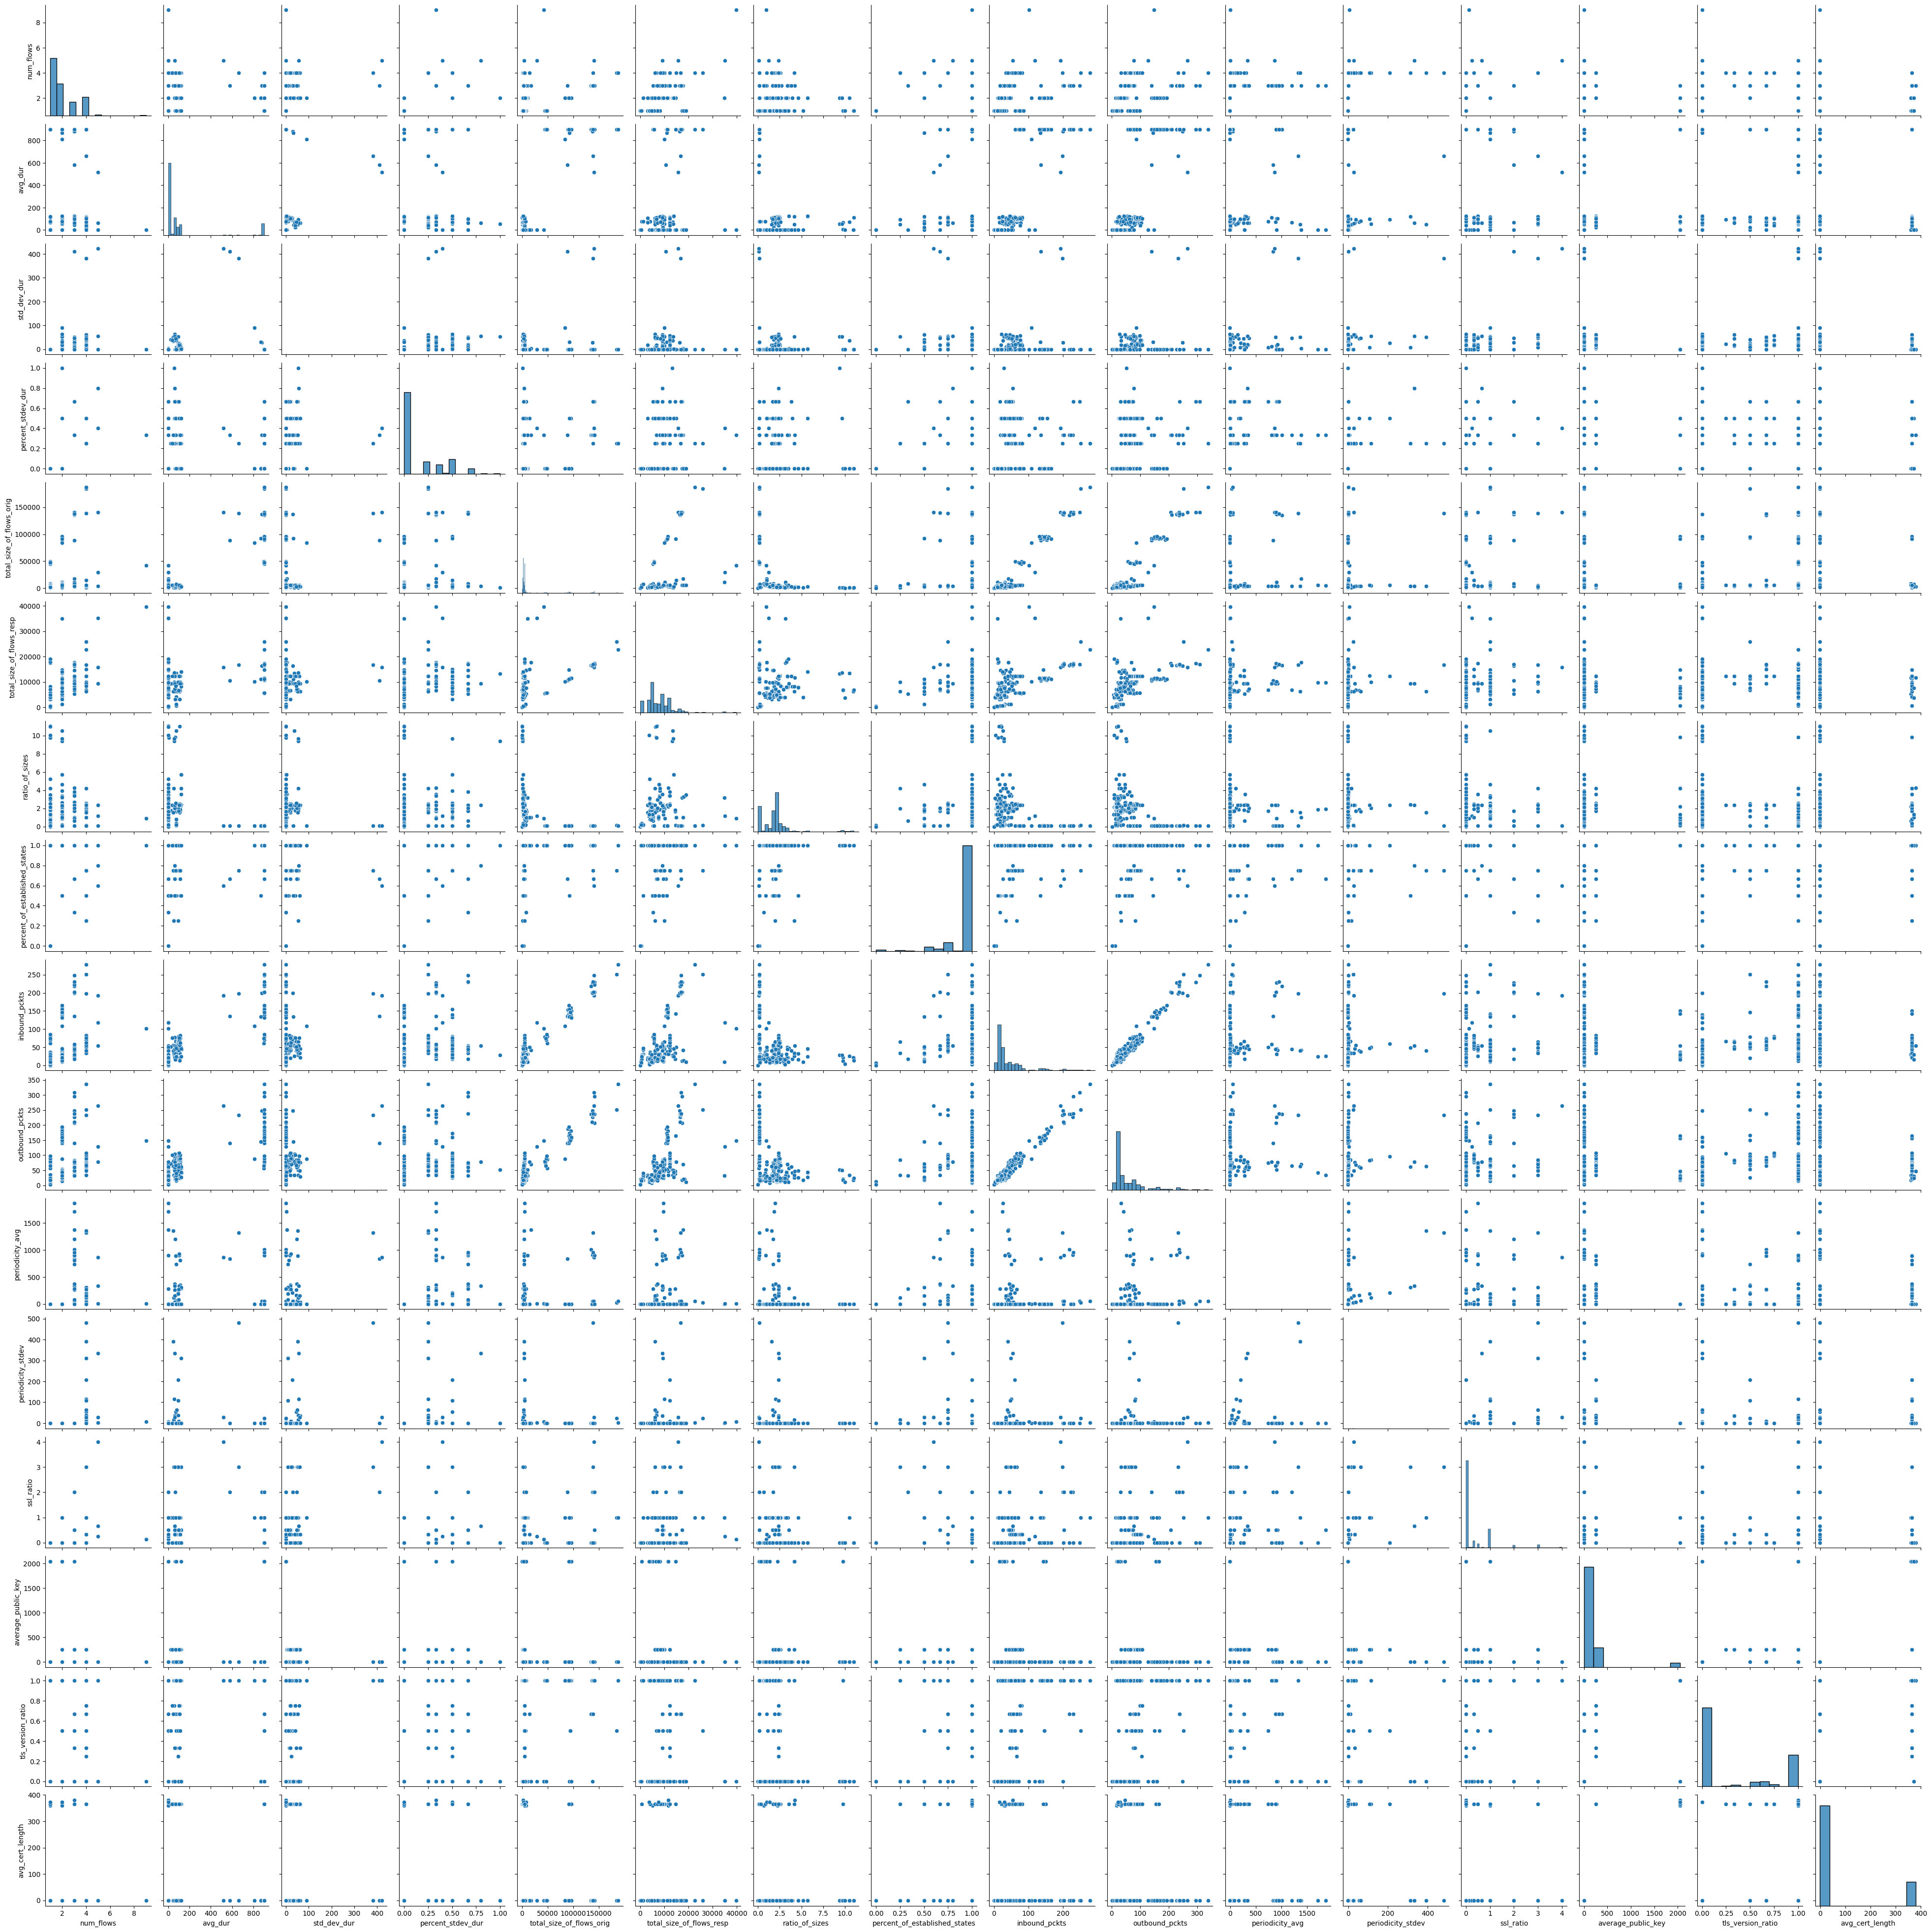

In [ ]:
import seaborn
seaborn.pairplot(sub_df)

In [11]:
# Delete the correlated features
# Get correlated matrix
cor_matrix = df_1_1.corr().abs()
# Get the upper triangle of the matrix
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
# Find columns to drop if they have more than .95 correlation
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
# drop
df_client1_nocorr = df_1_1.drop(df_1_1[to_drop], axis=1)

/tmp/ipykernel_1589728/3910169409.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.

